In [1]:
import pandas as pd

dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
x=dataset.drop(columns=['Outcome'])
y=dataset['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(
    x,y, random_state=42,test_size=0.2
)

In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(xtrain,ytrain)

predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)

0.5096471914376255


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7402597402597403

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models =[RandomForestRegressor(), LogisticRegression(), LinearRegression()]
errors={}
for model in models:
  model.fit(xtrain,ytrain)
  name=type(model).__name__
  score=model.score(xtest,ytest)
  errors[name]=score*100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
errors

{'RandomForestRegressor': 29.170181818181796,
 'LogisticRegression': 74.02597402597402,
 'LinearRegression': 25.50028117674176}

<BarContainer object of 3 artists>

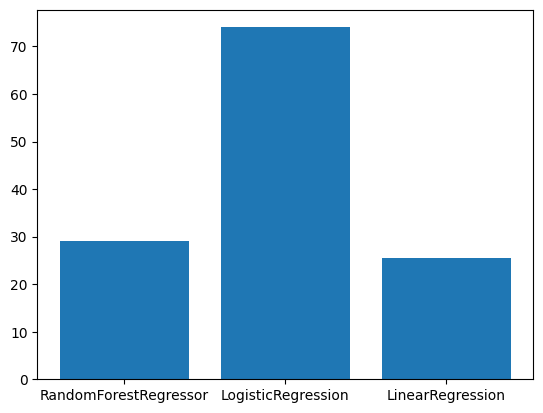

In [18]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())


/tmp/ipython-input-120495182.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


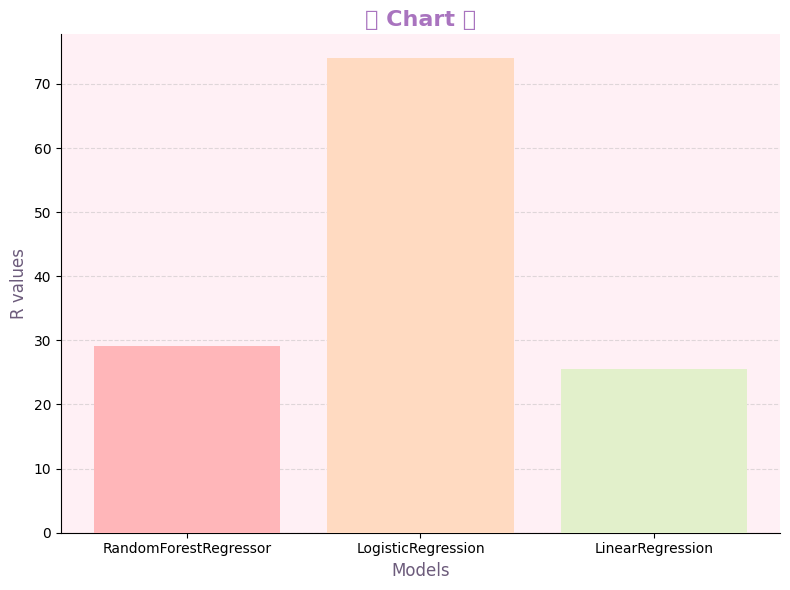

In [19]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
